# Project Milestone 2 - Screen Science

This is a python notebook containing the main code for the Applied Data Analysis project. Please refer to the README.md for an overview of the project.

## Table of contents:
* [Imports](#minusoneth)
* [Data loading](#zeroeth)
* [Exploratory data analysis](#second)
    * [Duplicate data](#second_b)
    * [Missing data](#second_a)
* [Data preprocessing](#first)
* [Focus : Technology in real life](#third)
    * [Lost movies](#third_a)
    * [Silent films & black and white films](#third_b)
    * [Special effects](#third_c)
* [Focus : Technology in movies](#fourth)
    * [Movies about technology](#fourth_a)
        * [Science Fiction & Fantasy](#fourth_a1)
        * [Keyphrase analysis](#fourth_a2)
        * [Historical events](#fourth_a3)
    * [Sentiment analysis](#fourth_b)
* [Next steps](#fifth)


## Imports <a class="anchor" id="minusoneth"></a>

We list the packages used by the project.

* [pandas](https://pandas.pydata.org/) - data handling
* [numpy](https://numpy.org/) - array math
* [seaborn](https://seaborn.pydata.org/) - visualisation
* [matplotlib](https://matplotlib.org/) - visualisation

In [4]:
# Imports
import pandas as pd
import numpy as np
import scipy as scp
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
import IPython.display
from helpers import *
from scipy.stats import bootstrap
# Imports and downloads
import nltk # Natural language processing library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
import os
import gzip
import tarfile
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
# Note some of these libraries are not in anaconda by default, meaning you will have to download them before using them-
# Package versions on last run
print_versions([pd, np, sns, mat])

pandas==2.0.3
numpy==1.25.2
seaborn==0.12.2
matplotlib==3.7.2


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Loading <a class="anchor" id="zeroeth"></a>

We employ `load_data_with_columns` to read data from the following files as dataframes with named columns. 
* `character.metadata.tsv`
* `movie.metadata.tsv`
* `name.clusters.txt`
* `plot_summaries.txt`
* `tvtropes.clusters.txt`

The column names are listed in `column_names.txt`. Additionally, some date fields are immediately parsed with `date_to_int`.

In [5]:
# Loading the data
DATAFOLDER = '../data/'

# Character metadata
character_metadata = load_data_with_columns(DATAFOLDER, 'character.metadata.tsv')
character_metadata = parse_as_year(character_metadata, 'movie_release_date')

# Movie metadata
movie_metadata = load_data_with_columns(DATAFOLDER, 'movie.metadata.tsv')
movie_metadata = parse_as_year(movie_metadata, 'movie_release_date')

# Plot summaries
plot_summaries = load_data_with_columns(DATAFOLDER, 'plot_summaries.txt')

## Exploratory data analysis <a class="anchor" id="second"></a>

We go ahead and look at the data, at first the number of entries, and we see that it is manageable.

In [6]:
# Display character metadata
display(character_metadata)
print("Number of entries: ", np.prod(character_metadata.shape))

,movie_wikipedia_id,movie_freebase_id,movie_release_date,character_name,actor_birth_date,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,freebase_map_id,character_freebase_id,actor_freebase_id
0,975900,/m/03vyhn,2001-01-01,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-01-01,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-01-01,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-01-01,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-01-01,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-01-01,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-01-01,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957-01-01,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957-01-01,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


Number of entries:  5858697


In [7]:
# Display movie metadata
display(movie_metadata)
print("Number of entries: ", np.prod(movie_metadata.shape))

,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-01-01,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-01-01,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama]
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-01-01,NaN,120.0,[English Language],[United States of America],[Drama]
81737,34980460,/m/0g4pl34,Knuckle,2011-01-01,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]"
81738,9971909,/m/02pygw1,Another Nice Mess,1972-01-01,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-01-01,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ..."


Number of entries:  735669


In [8]:
# Display plot summaries
display(plot_summaries)
print("Number of entries: ", np.prod(plot_summaries.shape))

,movie_wikipedia_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...
...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho..."
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look..."
42300,35102018,American Luthier focuses on Randy Parsons’ tra...
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se..."


Number of entries:  84606


**Initial remarks**
1. There appear to be more rows in movie_metadata than in plot_summaries. This can be due to duplicate or missing data. 

### Duplicate data <a class="anchor" id="second_b"></a>

We show the following: 
1. The wikipedia IDs are unique in `movie_metadata` and `plot_summaries`.
2. There are different movies with exactly the same plot summary text, due to different film industries or remakes of the same movie.

In [9]:
# The wikipedia_id's are unique in both tables.
assert(movie_metadata['movie_wikipedia_id'].is_unique)
assert(plot_summaries['movie_wikipedia_id'].is_unique)

# Summaries with no metadata
movie_metadata_ids = movie_metadata['movie_wikipedia_id'].to_list()
plot_summaries_ids = plot_summaries['movie_wikipedia_id'].to_list()
plot_no_metadata = [id for id in plot_summaries_ids if id not in movie_metadata_ids]

In [10]:
# Duplicate plot texts
duplicated_plots = plot_summaries[plot_summaries['plot'].duplicated(keep=False)]
print("There are {:d} plot summaries that appear more than once.".format(len(duplicated_plots['plot'].unique())))

There are 5 plot summaries that appear more than once.


In [11]:
# Left-merge movie metadata with plots. This disregards the 99 plots with no metadata
movies_with_plots = movie_metadata.merge(plot_summaries, how='left')

# There are movies with different titles but identical plots.
movies_with_plots.set_index('movie_wikipedia_id').loc[duplicated_plots['movie_wikipedia_id']].groupby('plot')['movie_name'].unique().reset_index()

,plot,movie_name
0,A woman is thrown out of her home by her jealo...,"[Madame X, The Trial of Madame X]"
1,An orphan Raghav turns into a ruthless contrac...,"[Antham, Drohi]"
2,"As the American Civil War begins, Ned Burton l...",[The Warrens of Virginia]
3,Raja was adopted by a criminal don at a very ...,[Amar Deep]
4,Taking a step aside from the usual serious dra...,"[Andhamaina Anubhavam, Ninaithale Inikkum]"


What can we know about these movies whose plots appear multiple times?

In [12]:
# Print data about those movies who share a plot with another movie.
movie_metadata[movie_metadata['movie_wikipedia_id'].isin(duplicated_plots['movie_wikipedia_id'])][['movie_name', 'movie_release_date', 'languages', 'countries']].sort_values(by='movie_name')

,movie_name,movie_release_date,languages,countries
22185,Amar Deep,1979-01-01,[Hindi Language],[India]
32255,Amar Deep,NaT,[Hindi Language],[]
59148,Andhamaina Anubhavam,1979-01-01,[Telugu language],[India]
67464,Antham,1992-01-01,[Telugu language],[India]
28621,Drohi,1992-01-01,[Hindi Language],[India]
18993,Madame X,1916-01-01,"[Silent film, English Language]",[United States of America]
49381,Madame X,1920-01-01,"[Silent film, English Language]",[United States of America]
57569,Madame X,1954-01-01,[Greek Language],[Greece]
65014,Madame X,1981-01-01,[English Language],[United States of America]
59142,Ninaithale Inikkum,1979-01-01,[Tamil Language],[India]


**We note the following**:
1. *Andhamaina Anubhavam* / *Ninaithale Inikkum* are the Telugu and Tamil names for the same movie. 
2. *Antham* / *Drohi* are the Telugu and Hindi names for the same movie.
3. There are multiple movie adaptations of the play *(The Trial of) Madame X*. 
4. There is a "lost" 1924 version of the movie The Warrens of Virginia, with the same plot, but it appears in this dataset.
5. The movie *Amar Deep* appearing twice appears to simply be a dataset error.

### Plot summaries word-count

We show that the word-counts follows a negative exponential distribution (y axis is in logarithmic scale). Most films have a short summary: most of them have a word-count below 500 words. In fact, nearly half of the dataset lies in the 100 to 500 words range. A very low percentage of films have a summary above 1000. Thus there might be a disparity in the precision of the plot due to the difference in length. Thus, longer plot summaries have higher chances of including multiple and more precise tech-related or event-related keywords.

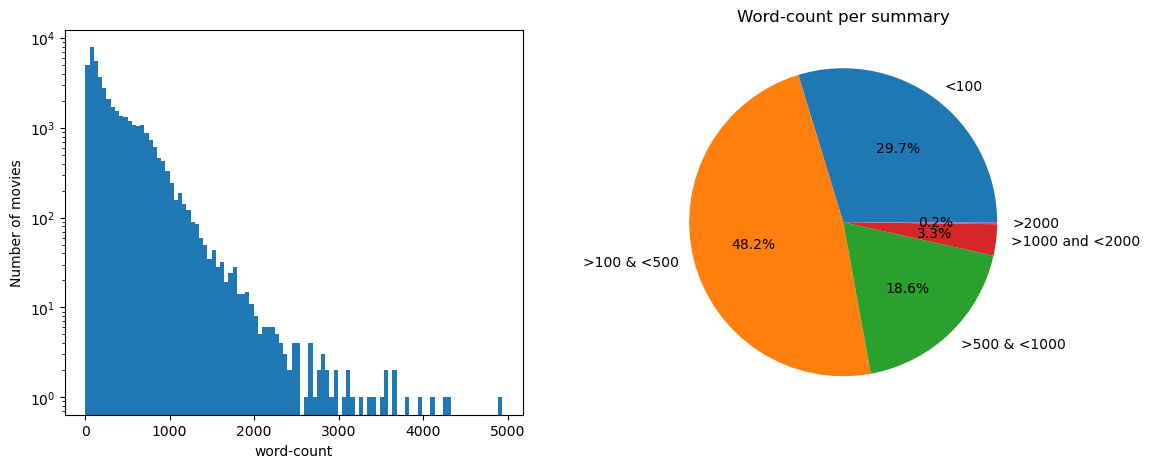

In [13]:
def length_plot(plot):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

    for char in punc:
        if np.isin(char, plot):
            plot.replace(char, '')
    
    split = plot.split()
    return len(split)

plot_summaries['word_count'] = plot_summaries['plot'].apply(length_plot)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (13, 5))
ax2.pie([plot_summaries[plot_summaries['word_count'] <= 100].shape[0], plot_summaries[(plot_summaries['word_count'] > 100)&(plot_summaries['word_count'] <= 500)].shape[0], plot_summaries[(plot_summaries['word_count'] > 500)&(plot_summaries['word_count'] <= 1000)].shape[0],
          plot_summaries[(plot_summaries['word_count'] > 1000)&(plot_summaries['word_count'] <= 2000)].shape[0], plot_summaries[plot_summaries['word_count'] > 2000].shape[0]],
          labels = ['<100', '>100 & <500', '>500 & <1000', '>1000 and <2000', '>2000'], autopct='%1.1f%%')
ax1.hist(plot_summaries['word_count'], bins= round(plot_summaries['word_count'].max()/50))
ax1.set_yscale('log')
ax1.set_ylabel('Number of movies')
ax1.set_xlabel('word-count')
plt.title('Word-count per summary')
plt.show()

### Missing data <a class="anchor" id="second_a"></a>

We show the following:
1. The wikipedia IDs in `plot_summaries` are not a subset of those in `movie_metadata`, as there are 99 summaries with no associated metadata. 
2. The percentage of missing plot summaries per decade **decreases**, while the absolute number of missing plot summaries **increases**.

In [14]:
# Number of summaries with no metadata.
print("There are {:d} plot summaries with no associated metadata".format(len(plot_no_metadata)))
plot_summaries.set_index('movie_wikipedia_id').loc[plot_no_metadata].reset_index()

There are 99 plot summaries with no associated metadata


,movie_wikipedia_id,plot,word_count
0,2862137,Sathyanarayan Murthy is a rough but kind man ...,105
1,33334420,{{more plot}} Mural tells the story of Zhu Xia...,53
2,16758721,"The story is about a young man “Tony”, a 25 ye...",128
3,23217064,"Years before the events of the first film, Lo...",657
4,2746943,"A young 16-year-old girl, Zhu Ying Tai, manage...",475
...,...,...,...
94,35607003,Parisian Marion is living in New York with her...,21
95,32942181,"Rajat , Nishant ""Liquid"" Agarwal and Vikrant ...",365
96,133671,Gerry Conlon is shown in Belfast stripping le...,402
97,34076714,"After a hit gone wrong, Nikita, an exiled Russ...",94


What is the percentage of missing plot summary data per decade?

In [15]:
# Bin movies into decades
movies_with_decades = bin_into_decades(movies_with_plots, 'movie_release_date').copy()

# Bootstrap parameters
bootstrap_args = {'statistic' : percent_nans, 'n_resamples':100, 'confidence_level':0.95, 'alternative':'two-sided', 'method':'percentile'}

# Groupby decades
plots_by_decade = movies_with_decades.groupby('decade', observed=False, group_keys=True)['plot']

# Perform bootstrap estimation of missing plot summary data
intervals_by_decade = plots_by_decade.apply(lambda x: bootstrap((duplicate_singleton(x), ), **bootstrap_args).confidence_interval[:])

# Unpack intervals into dataframe
low_high_by_decade = expand_list_data(pd.DataFrame(intervals_by_decade).set_axis(['interval'],axis=1), 'interval', ['low', 'high']).copy()

# Put data together
missing_plots = pd.concat([pd.DataFrame({
    'mean':plots_by_decade.apply(percent_nans), 
    'count':plots_by_decade.apply(lambda x: x.isnull().sum())}), 
    low_high_by_decade], axis=1)

In [16]:
movies_with_plots

,movie_wikipedia_id,movie_freebase_id,movie_name,movie_release_date,box_office,runtime,languages,countries,genres,plot
0,975900,/m/03vyhn,Ghosts of Mars,2001-01-01,14010832.0,98.0,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-01-01,NaN,95.0,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",NaN
2,28463795,/m/0crgdbh,Brun bitter,1988-01-01,NaN,83.0,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",NaN
3,9363483,/m/0285_cd,White Of The Eye,1987-01-01,NaN,110.0,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",A series of murders of rich young women throug...
4,261236,/m/01mrr1,A Woman in Flames,1983-01-01,NaN,106.0,[German Language],[Germany],[Drama],"Eva, an upper class housewife, becomes frustra..."
...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-01-01,NaN,120.0,[English Language],[United States of America],[Drama],Two former National Oceanic Atmospheric Admini...
81737,34980460,/m/0g4pl34,Knuckle,2011-01-01,NaN,96.0,[English Language],"[Ireland, United Kingdom]","[Biographical film, Drama, Documentary]",{{No plot}} This film follows 12 years in the ...
81738,9971909,/m/02pygw1,Another Nice Mess,1972-01-01,NaN,66.0,[English Language],[United States of America],"[Satire, Comedy]",NaN
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-01-01,NaN,150.0,[Japanese Language],[Japan],"[Science Fiction, Japanese Movies, Adventure, ...","The story takes place in the year 2092,The Sup..."


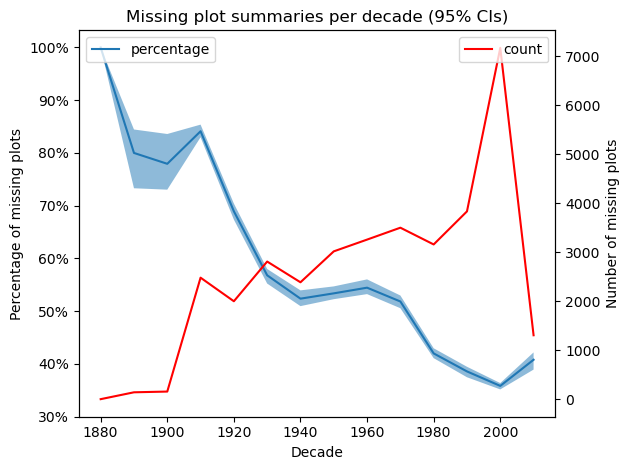

In [17]:
# Plot percentage and count
fig, ax1 = plt.subplots()
ax1.set_title(f"Missing plot summaries per decade (95% CIs)")
ax1.set_xlabel("Decade")
ax1.set_ylabel("Percentage of missing plots")
plot_with_confidence(missing_plots, 'mean', 'percentage', ax1)
ax1.set_yticks(ticks=ax1.get_yticks()[:-1], labels=["{:.0f}%".format(p*100) for p in ax1.get_yticks()[:-1]])
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.set_ylabel('Number of missing plots')
ax2.plot(missing_plots['count'], label = 'count', color='red')
ax2.legend(loc='upper right')
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()

## Data preprocessing  <a class="anchor" id="first"></a>

## Focus : Technology in real life <a class="anchor" id="third"></a>

### Lost movies <a class="anchor" id="third_a"></a>

### Silent & black and white films <a class="anchor" id="third_b"></a>

### Special effects <a class="anchor" id="third_c"></a>

## Focus : Technology in movies <a class="anchor" id="fourth"></a>

### Movies about technology <a class="anchor" id="fourth_a"></a>

#### Science fiction & fantasy <a class="anchor" id="fourth_a1"></a>

#### Keyphrase analysis <a class="anchor" id="fourth_a2"></a>

A big portion of the work needed to analyze technologies in films and in the movie industry lies in the analysis of the move plot summaries. 
Technically, this analysis is done by extracting the useful words in the plots. 
Hence, in this section we:
1) Seperate the movie IDs from the plots as dictionaries
2) Use the NTLK library to tokenize the movie plots
3) Define a list of words to use for the search
4) Count the number of movies that contain at least 1 word in the given list per year
5) Plot the result in a graph

In [31]:
# Copy the movie dataframe already created and convert dates into years as integers.

movies_df = movie_metadata.copy()
movies_df['movie_release_date'] = movie_metadata['movie_release_date'].apply(lambda x : x.year)
movies_df['movie_release_date'] = movies_df['movie_release_date'].fillna(0).astype(int)

# Read the plot summaries from the text file
with open(DATAFOLDER + 'plot_summaries.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()

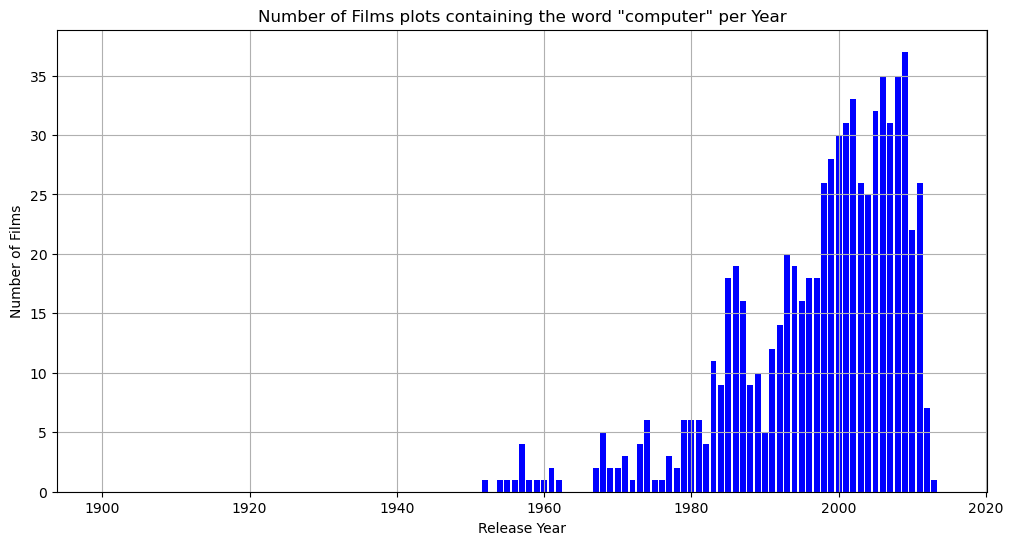

In [33]:
# Extract movie IDs and plot summaries and put them in separate lists.
movie_ids = []
plot_summaries = []

for line in lines:
    parts = line.split('\t')
    if len(parts) == 2:
        movie_id, summary = parts
        movie_ids.append(int(movie_id))
        plot_summaries.append(summary)

# Tokenize and preprocess the plot summaries
tokenized_summaries = []
for summary in plot_summaries:
    tokens = word_tokenize(summary)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in stop_words]
    tokenized_summaries.extend(tokens)

# Define a list of technology-related keywords (to be modified at our convenience)
technology_keywords = ["computer", "computers","Computer", "Computers"]

# Create a dictionary to store film years based on movie IDs, with IDs as keys and movie plot summaries as values

film_years = {}
for index, row in movies_df.iterrows():
    film_years[row['movie_wikipedia_id']] = row['movie_release_date']
    
# Initialize a dictionary to store the film counts per year

film_counts_by_year = {year: 0 for year in range(1900, 2015)}

# Count the occurrence of technology-related keywords
technology_word_counts = Counter(word for word in tokenized_summaries if word in technology_keywords)

# Determine for which years films contain technology-related words and fill film_counts_by_year 
for movie_id in movie_ids:
    if movie_id in film_years:
        year = int(film_years[movie_id])
        if year in film_counts_by_year:
            summary = plot_summaries[movie_ids.index(movie_id)]
            if any(keyword in summary for keyword in technology_keywords):
                film_counts_by_year[year] += 1

# Create a list of years and corresponding film counts
years = list(film_counts_by_year.keys())
film_counts = list(film_counts_by_year.values())

# Plot the number of films containing technology-related words per year
plt.figure(figsize=(12, 6))
plt.bar(years, film_counts, color='b')
plt.title('Number of Films plots containing the word "computer" per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Films')
plt.grid(True)
plt.show()


#### Historical events <a class="anchor" id="fourth_a3"></a>

### Sentiment analysis <a class="anchor" id="fourth_b"></a>

## Next steps <a class="anchor" id="fifth"></a>

(Todo)